In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [552]:
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/msht/ML_Course/main/result.csv', sep = ',', header=None)

In [553]:
raw_dataset.columns = ['Percentage', 'strain_XX', 'strain_XY','strain_YZ','stress_XX', 'stress_XY','stress_YZ']

In [554]:
raw_dataset['Percentage'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [555]:
palette = np.array(sns.color_palette("bright", 15))  #Chossing color 

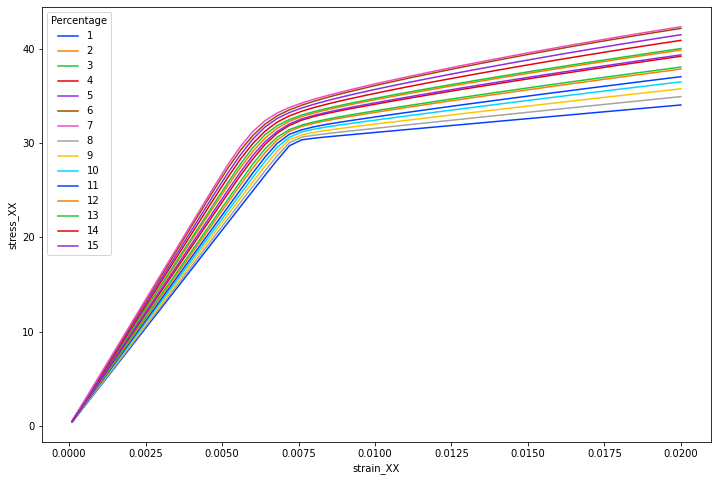

In [556]:
plt.figure(figsize = (12,8))
palette = sns.color_palette("bright", 15)  #Chossing color 
sns.lineplot( x = 'strain_XX', y = 'stress_XX', data = raw_dataset, palette=palette, hue = 'Percentage', legend = 'full')
plt.show()

**Split Data into X & Y**

In [557]:
X = raw_dataset.iloc[:,0:4]
Y = raw_dataset.iloc[:,4:7]

In [558]:
X

,Percentage,strain_XX,strain_XY,strain_YZ
0,1,0.0001,-0.000034,-1.499200e-08
1,1,0.0002,-0.000068,-3.182700e-08
2,1,0.0012,-0.000412,-1.923900e-07
3,1,0.0016,-0.000549,-2.567300e-07
4,1,0.0020,-0.000687,-3.219800e-07
...,...,...,...,...
745,15,0.0184,-0.010528,3.256300e-04
746,15,0.0188,-0.010827,3.360400e-04
747,15,0.0192,-0.011128,3.464400e-04
748,15,0.0196,-0.011430,3.568800e-04


In [559]:
Y

,stress_XX,stress_XY,stress_YZ
0,0.41647,0.002704,0.000003
1,0.83108,0.002189,-0.000001
2,4.98100,0.004208,0.000003
3,6.64090,0.003861,0.000011
4,8.30060,0.003834,0.000011
...,...,...,...
745,38.58800,0.006364,0.000409
746,38.77500,0.006454,0.000419
747,38.96000,0.006539,0.000428
748,39.14400,0.006621,0.000433


**Pre-Processing of Dataset**

In [560]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [561]:
# Applying Transformation
scaler_X = scaler.fit(X)
scaled_X = scaler_X.transform(X)

In [562]:
# Applying Transformation
scaler_Y = scaler.fit(Y)
scaled_Y = scaler_Y.transform(Y)

In [563]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, scaled_Y, test_size = 0.01, random_state = 3)

In [564]:
len(X_train)

742

**ANN Regression**

In [565]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [566]:
model=Sequential([
    Dense(64, input_dim=4,activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3)
])

In [567]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_65 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_67 (Dense)             (None, 3)                 387       
Total params: 25,539
Trainable params: 25,539
Non-trainable params: 0
_________________________________________________________________


In [568]:
model.compile(Adam(learning_rate=0.00001), loss='mean_squared_error', metrics=['accuracy'])

In [569]:
# Epochs = Number of Iterations, Batch Size = number of samples per execution
# validation_split = 10% of overall training samples to validate algorithm parallely to avoid overfitting of algorithm
history = model.fit(X_train, Y_train, validation_split=0.01, batch_size=10, epochs=2000, shuffle=True, verbose=2)

Epoch 1/2000
74/74 - 1s - loss: 0.3942 - accuracy: 0.5518 - val_loss: 0.3279 - val_accuracy: 0.6250
Epoch 2/2000
74/74 - 0s - loss: 0.3578 - accuracy: 0.5313 - val_loss: 0.2934 - val_accuracy: 0.6250
Epoch 3/2000
74/74 - 0s - loss: 0.3234 - accuracy: 0.5095 - val_loss: 0.2611 - val_accuracy: 0.6250
Epoch 4/2000
74/74 - 0s - loss: 0.2898 - accuracy: 0.5014 - val_loss: 0.2304 - val_accuracy: 0.6250
Epoch 5/2000
74/74 - 0s - loss: 0.2561 - accuracy: 0.5041 - val_loss: 0.1994 - val_accuracy: 0.6250
Epoch 6/2000
74/74 - 0s - loss: 0.2226 - accuracy: 0.5095 - val_loss: 0.1705 - val_accuracy: 0.6250
Epoch 7/2000
74/74 - 0s - loss: 0.1916 - accuracy: 0.5259 - val_loss: 0.1446 - val_accuracy: 0.6250
Epoch 8/2000
74/74 - 0s - loss: 0.1634 - accuracy: 0.5341 - val_loss: 0.1217 - val_accuracy: 0.6250
Epoch 9/2000
74/74 - 0s - loss: 0.1383 - accuracy: 0.5518 - val_loss: 0.1023 - val_accuracy: 0.6250
Epoch 10/2000
74/74 - 0s - loss: 0.1166 - accuracy: 0.5695 - val_loss: 0.0866 - val_accuracy: 0.6250

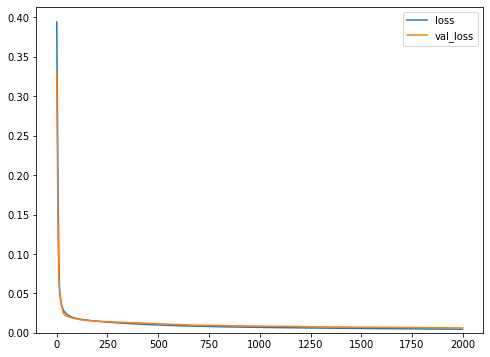

In [570]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize = (8,6))
plt.ylim(bottom=0)
plt.show()

In [571]:
predictions=model.predict(X_test)

In [572]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.8162281126375547

In [573]:
sigma=scaler_Y.inverse_transform(predictions)
print(sigma)

[[ 1.1866797e+01  3.4479278e-03  2.5010660e-05]
 [ 3.3074501e+01  6.2587657e-03  4.0393512e-05]
 [ 1.5760841e+01  2.5412778e-03 -6.8774687e-05]
 [ 7.2109640e-01  3.3917930e-03  1.1560366e-05]
 [ 3.4797428e+01  5.3618574e-03  1.8791217e-04]
 [ 3.9205639e+01  6.5518203e-03 -1.1808711e-04]
 [ 3.5143791e+01  5.5989092e-03  1.6711451e-04]
 [ 2.3524860e+01  3.0433121e-03 -7.9284691e-06]]


In [574]:
np.savetxt('sigma.csv',sigma, delimiter=',')

In [575]:
model.save('NNforclass.h5')

In [576]:
model.save_weights('NNforclass.h5')

In [577]:
model.get_weights()

[array([[-0.21264625,  0.31595898, -0.19694395, -0.24281321,  0.132424  ,
         -0.24901044,  0.12721805,  0.02862977,  0.00529563,  0.11189797,
         -0.03571348, -0.18079951, -0.46388477, -0.2602967 ,  0.08803682,
         -0.06587444, -0.03111866, -0.04351872, -0.02012837, -0.11989541,
         -0.25881353,  0.0129329 , -0.05444865, -0.41489223, -0.30720165,
         -0.22510049,  0.12613668, -0.23542012,  0.2793082 , -0.16898271,
         -0.06259566, -0.04244755,  0.36837688, -0.23008187, -0.00911124,
         -0.08014268, -0.2887401 ,  0.08683353,  0.0200904 , -0.2657849 ,
          0.12704767, -0.3179949 ,  0.35921276, -0.20945986, -0.04336412,
         -0.06660293,  0.15039267,  0.33562565,  0.2298704 , -0.23092061,
          0.23357907,  0.16680664,  0.08829641, -0.0429999 ,  0.12672721,
          0.30729148, -0.11297173,  0.25053918,  0.11750602, -0.06280828,
         -0.14962   ,  0.34084427,  0.10559217, -0.13762207],
        [ 0.31350577,  0.25546086,  0.21528222,  0

**Let's try to predict a stress-strain curve**

In [578]:
predict_dataset = raw_dataset[raw_dataset['Percentage']==5]

In [579]:
X_predict = (predict_dataset.iloc[:,0:4])
Y_predict = (predict_dataset.iloc[:,4:7])

In [580]:
predScaler_X = scaler.fit(X_predict)
scaled_X_predict = predScaler_X.transform(X_predict)

In [581]:
new_predictions=model.predict(scaled_X_predict)

In [582]:
predScaler_Y = scaler.fit(Y)
predSigma = predScaler_Y.inverse_transform(new_predictions)

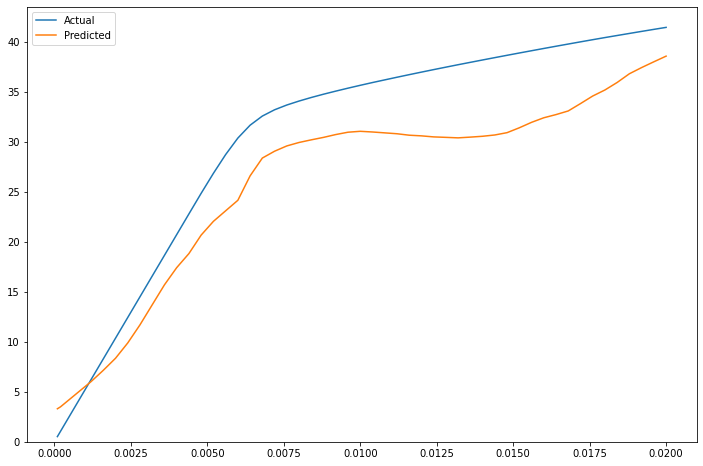

In [583]:
plt.figure(figsize = (12,8))
plt.plot(X_predict.iloc[:,1],Y_predict.iloc[:,0])
plt.plot(X_predict.iloc[:,1],predSigma[:,0])
plt.legend(['Actual','Predicted'])
plt.ylim(bottom=0)
plt.show()